Student name: Amirhossein Shanaghi

student ID: 810899056

**Orthogonal Regression**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def orthogonal_regression_manual(points):
    """
    Perform orthogonal regression on given points using manual calculation.

    Parameters:
    points (ndarray): An array of shape (m, 2) where each row represents a point (x, y).

    Returns:
    slope (float): Slope of the regression line.
    intercept (float): Intercept of the regression line.
    eigenvector (ndarray): Eigenvector corresponding to the minimum eigenvalue.
    y (float): Computed intercept y.
    min_eigenvalue (float): Minimum eigenvalue.
    """

    A = np.vstack(points)
    m = A.shape[0]
    e = np.ones((m, 1))
    I_m = np.eye(m)
    B = A.T @ (I_m - (1/m) * e @ e.T) @ A
    eigenvalues, eigenvectors = eigh(B)
    min_eigenvalue_index = np.argmin(eigenvalues)
    x = eigenvectors[:, min_eigenvalue_index]
    y = (1/m) * e.T @ A @ x
    slope = -x[0] / x[1]
    intercept = y[0] / x[1]

    return slope, intercept

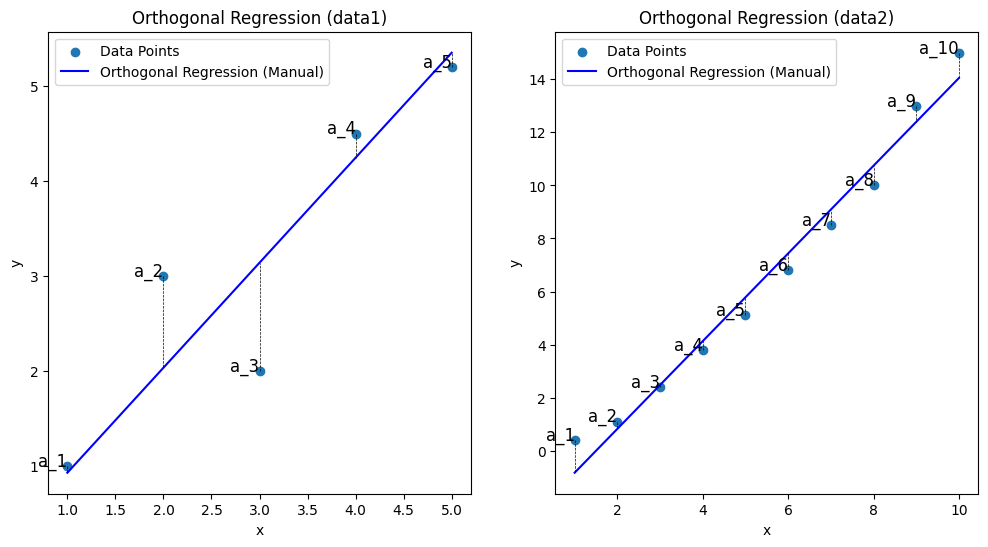

Manual Calculation for data1:
Manual Slope: 1.1056541089254783
Manual Intercept: -0.1769623267764353

Manual Calculation for data2:
Manual Slope: 1.6527258363686612
Manual Intercept: -2.479992100027636


In [30]:
data1 = np.loadtxt('data1.txt')
data2 = np.loadtxt('data2.txt')

slope1, intercept1 = orthogonal_regression_manual(data1)
slope2, intercept2 = orthogonal_regression_manual(data2)

def plot_orthogonal_regression(data, slope, intercept, title):
    plt.scatter(data[:, 0], data[:, 1], label='Data Points')
    plt.plot(data[:, 0], slope * data[:, 0] + intercept, label='Orthogonal Regression (Manual)', color='b')

    for i, (x, y) in enumerate(data):
        y_reg = slope * x + intercept
        plt.plot([x, x], [y, y_reg], 'k--', linewidth=0.5)
        plt.text(x, y, f'a_{i+1}', fontsize=12, ha='right')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_orthogonal_regression(data1, slope1, intercept1, 'Orthogonal Regression (data1)')

plt.subplot(1, 2, 2)
plot_orthogonal_regression(data2, slope2, intercept2, 'Orthogonal Regression (data2)')

plt.show()

print("Manual Calculation for data1:")

print("Manual Slope:", slope1)
print("Manual Intercept:", intercept1)

print("\nManual Calculation for data2:")

print("Manual Slope:", slope2)
print("Manual Intercept:", intercept2)



Saving boston.csv to boston (4).csv


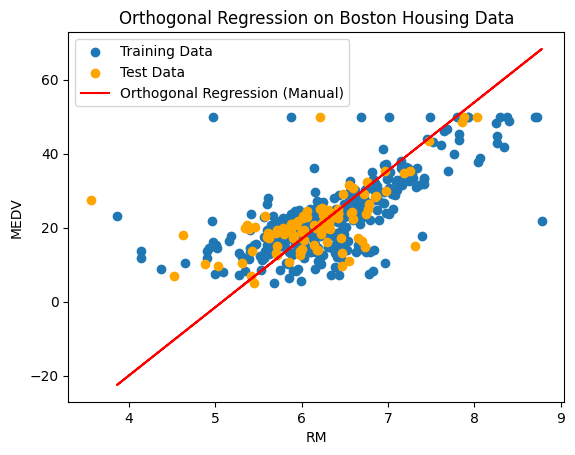

Manual Calculation:
Manual Slope: 18.456285740972298
Manual Intercept: -93.77135599598947
Manual MSE on Test Set: 95.37788150205462


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()
data = pd.read_csv('boston.csv')

X = data[['RM']].values
y = data['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def orthogonal_regression_manual(X, y):
    A = np.hstack((X, y.reshape(-1, 1)))
    m = A.shape[0]
    e = np.ones((m, 1))
    I_m = np.eye(m)
    B = A.T @ (I_m - (1/m) * e @ e.T) @ A
    eigenvalues, eigenvectors = eigh(B)
    min_eigenvalue_index = np.argmin(eigenvalues)
    x = eigenvectors[:, min_eigenvalue_index]
    y_intercept = (1/m) * e.T @ A @ x
    slope = -x[0] / x[1]
    intercept = y_intercept[0] / x[1]
    return slope, intercept

slope_manual, intercept_manual = orthogonal_regression_manual(X_train, y_train)
y_pred_manual = slope_manual * X_test.flatten() + intercept_manual
mse_manual = mean_squared_error(y_test, y_pred_manual)

plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data', color='orange')
plt.plot(X_train, slope_manual * X_train.flatten() + intercept_manual, label='Orthogonal Regression (Manual)', color='r')
plt.legend()
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Orthogonal Regression on Boston Housing Data')
plt.show()

print("Manual Calculation:")

print("Manual Slope:", slope_manual)
print("Manual Intercept:", intercept_manual)
print("Manual MSE on Test Set:", mse_manual)



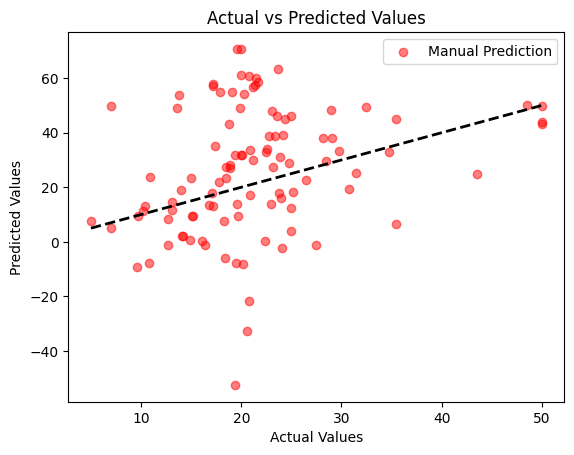

Manual Calculation:
Manual Slope: [-3.29911268e-01 -7.48555205e-02  1.77757503e+00  1.07105484e+01
 -4.21522125e+02  1.00648245e+00  3.24580583e-01 -7.25160226e+00
  1.07865239e+00  2.93354964e-02 -5.65762310e+00 -3.46098189e-03
  1.28124770e-01]
Manual Intercept: 319.4649391562752
Manual MSE on Test Set: 517.5868526247189


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



data = pd.read_csv('boston.csv')
X = data.drop(columns=['MEDV']).values
y = data['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def orthogonal_regression_manual(X, y):
    A = np.hstack((X, y.reshape(-1, 1)))
    m = A.shape[0]
    e = np.ones((m, 1))
    I_m = np.eye(m)
    B = A.T @ (I_m - (1/m) * e @ e.T) @ A
    eigenvalues, eigenvectors = eigh(B)
    min_eigenvalue_index = np.argmin(eigenvalues)
    x = eigenvectors[:, min_eigenvalue_index]
    y_intercept = (1/m) * e.T @ A @ x
    slope = -x[:-1] / x[-1]
    intercept = y_intercept[0] / x[-1]
    return slope, intercept

slope_manual, intercept_manual = orthogonal_regression_manual(X_train, y_train)
y_pred_manual = X_test @ slope_manual + intercept_manual
mse_manual = mean_squared_error(y_test, y_pred_manual)



plt.scatter(y_test, y_pred_manual, label='Manual Prediction', color='r', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

print("Manual Calculation:")

print("Manual Slope:", slope_manual)
print("Manual Intercept:", intercept_manual)
print("Manual MSE on Test Set:", mse_manual)




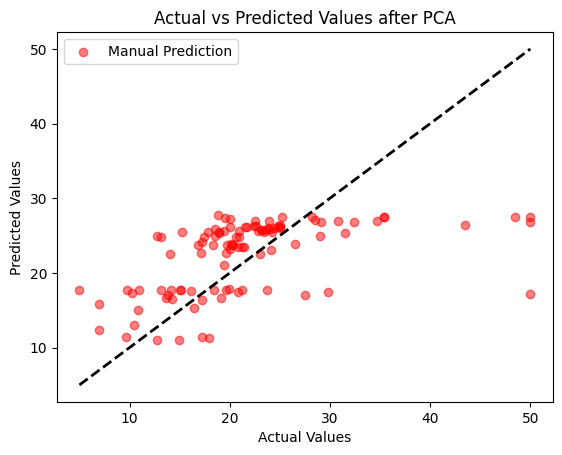

Manual Calculation:
Manual Slope: [-0.02580016 -0.01032755]
Manual Intercept: 22.712348962787758
Manual MSE on Test Set: 55.01894643012814


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


data = pd.read_csv('boston.csv')

X = data.drop(columns=['MEDV']).values
y = data['MEDV'].values

n_components = 2  # Number of components to keep
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Function for manual orthogonal regression with multiple features
def orthogonal_regression_manual(X, y):
    A = np.hstack((X, y.reshape(-1, 1)))
    m = A.shape[0]
    e = np.ones((m, 1))
    I_m = np.eye(m)
    B = A.T @ (I_m - (1/m) * e @ e.T) @ A
    eigenvalues, eigenvectors = eigh(B)
    min_eigenvalue_index = np.argmin(eigenvalues)
    x = eigenvectors[:, min_eigenvalue_index]
    y_intercept = (1/m) * e.T @ A @ x
    slope = -x[:-1] / x[-1]
    intercept = y_intercept[0] / x[-1]
    return slope, intercept

slope_manual, intercept_manual = orthogonal_regression_manual(X_train, y_train)
y_pred_manual = X_test @ slope_manual + intercept_manual
mse_manual = mean_squared_error(y_test, y_pred_manual)



plt.scatter(y_test, y_pred_manual, label='Manual Prediction', color='r', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values after PCA')
plt.legend()
plt.show()

print("Manual Calculation:")

print("Manual Slope:", slope_manual)
print("Manual Intercept:", intercept_manual)
print("Manual MSE on Test Set:", mse_manual)

